In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [3]:
start = '2020-01-01'
end = '2024-04-22'

# Get the data
df = yf.download('RELIANCE.NS', start=start, end=end)
df = df[['Open', 'High', 'Low', 'Close']]
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
# print(df.head())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611
2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024
2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553
2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605
2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699


In [4]:
df.tail()

,Open,High,Low,Close
Date,,,,
2024-04-12,2951.750000,2972.949951,2926.149902,2934.300049
2024-04-15,2922.000000,2964.250000,2892.649902,2929.649902
2024-04-16,2906.699951,2942.350098,2901.850098,2931.500000
2024-04-18,2927.000000,2972.000000,2918.699951,2928.649902
2024-04-19,2913.550049,2948.000000,2886.050049,2940.250000


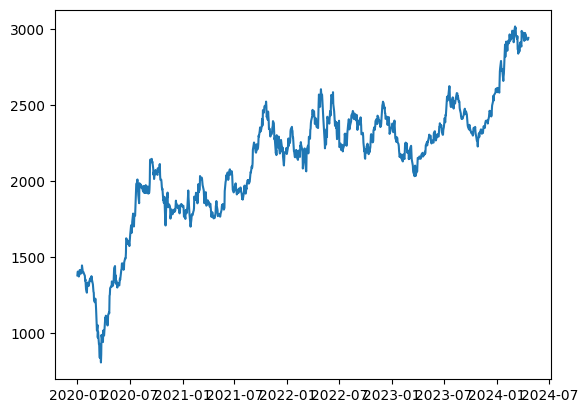

In [5]:
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close
Date,,,,
2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611
2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024
2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553
2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605
2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699
...,...,...,...,...
2024-04-12,2951.750000,2972.949951,2926.149902,2934.300049
2024-04-15,2922.000000,2964.250000,2892.649902,2929.649902
2024-04-16,2906.699951,2942.350098,2901.850098,2931.500000


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2020-01-01            NaN
2020-01-02            NaN
2020-01-03            NaN
2020-01-06            NaN
2020-01-07            NaN
                 ...     
2024-04-12    2733.888994
2024-04-15    2739.620994
2024-04-16    2745.328994
2024-04-18    2751.059993
2024-04-19    2756.968992
Name: Close, Length: 1065, dtype: float64

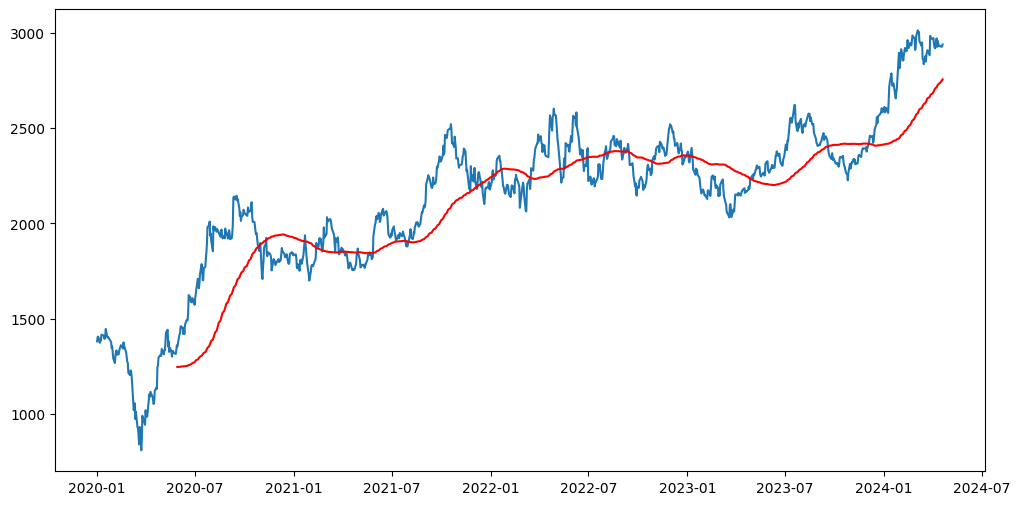

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2020-01-01            NaN
2020-01-02            NaN
2020-01-03            NaN
2020-01-06            NaN
2020-01-07            NaN
                 ...     
2024-04-12    2575.366920
2024-04-15    2578.214158
2024-04-16    2581.037417
2024-04-18    2583.979338
2024-04-19    2587.075021
Name: Close, Length: 1065, dtype: float64

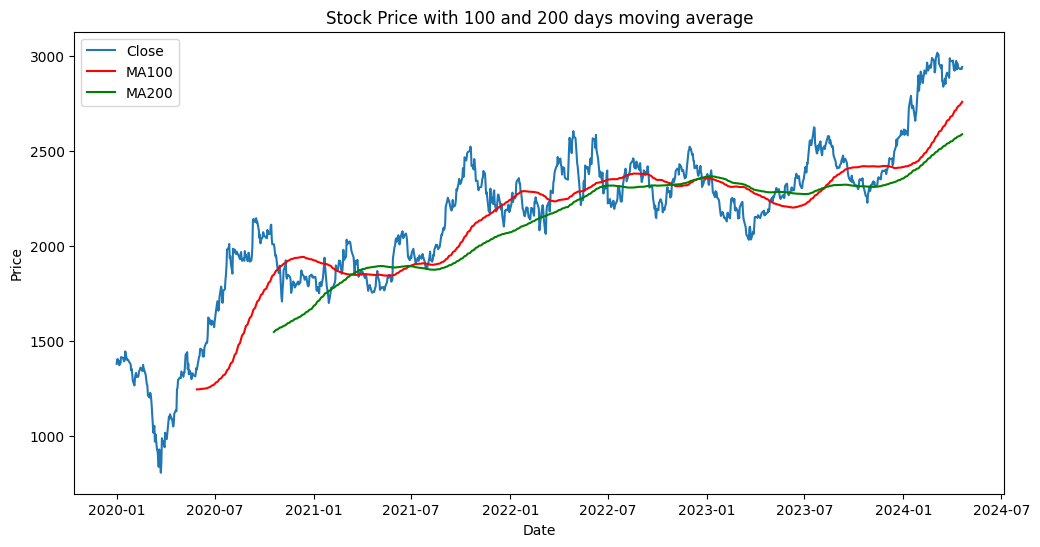

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.legend(['Close', 'MA100', 'MA200'])
plt.title('Stock Price with 100 and 200 days moving average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [11]:
df.shape

(1065, 4)

In [12]:
# splitting the data into training and test set

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(745, 1)
(320, 1)


In [13]:
data_training.head()

,Close
Date,
2020-01-01,1380.276611
2020-01-02,1403.775024
2020-01-03,1405.466553
2020-01-06,1372.870605
2020-01-07,1393.991699


In [14]:
data_testing.head()

,Close
Date,
2022-12-29,2347.465088
2022-12-30,2351.064697
2023-01-02,2377.554932
2023-01-03,2360.156250
2023-01-04,2324.620850


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.31874677],
       [0.33184215],
       [0.33278482],
       [0.3146195 ],
       [0.32639002],
       [0.32055571],
       [0.33831341],
       [0.33813504],
       [0.33612236],
       [0.32883585],
       [0.32600784],
       [0.33316694],
       [0.35512844],
       [0.330339  ],
       [0.33112881],
       [0.33084853],
       [0.32753651],
       [0.32483592],
       [0.31719267],
       [0.29946048],
       [0.30358782],
       [0.28519317],
       [0.26883672],
       [0.25551209],
       [0.27635256],
       [0.28761349],
       [0.29235227],
       [0.28004677],
       [0.28104039],
       [0.2897791 ],
       [0.29872162],
       [0.30068335],
       [0.3075368 ],
       [0.3027725 ],
       [0.29724391],
       [0.31579142],
       [0.30669604],
       [0.28580461],
       [0.2712571 ],
       [0.25882411],
       [0.25589427],
       [0.22654434],
       [0.22017506],
       [0.2337799 ],
       [0.23217484],
       [0.21762733],
       [0.19716898],
       [0.117

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
#ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.optimizers import Adam
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

In [19]:
# model = Sequential()
# model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
# model.add(Dropout(0.2))

# model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
# model.add(Dropout(0.3))

# model.add(LSTM(units=80, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
# model.add(Dropout(0.4))

# model.add(LSTM(units=120, activation='relu')) 
# model.add(Dropout(0.5))

# model.add(Dense(units=1))


model = Sequential()

# First LSTM layer
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=32))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [21]:

# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, epochs = 100) #Train the model using the training data

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 9s 115ms/step - loss: 0.0820
Epoch 2/100
21/21 [==============================] - 2s 112ms/step - loss: 0.0159
Epoch 3/100
21/21 [==============================] - 2s 108ms/step - loss: 0.0119
Epoch 4/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0115
Epoch 5/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0099
Epoch 6/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0089
Epoch 7/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0093
Epoch 8/100
21/21 [==============================] - 2s 106ms/step - loss: 0.0092
Epoch 9/100
21/21 [==============================] - 2s 109ms/step - loss: 0.0086
Epoch 10/100
21/21 [==============================] - 2s 106ms/step - loss: 0.0085
Epoch 11/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0091
Epoch 12/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0084
Epoch 13/100


In [22]:
# model.save('./LSTM_model.h5')
model.save('./LSTM_model_adam.h5')

C:\Users\Aditya\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
data_testing.head()

,Close
Date,
2022-12-29,2347.465088
2022-12-30,2351.064697
2023-01-02,2377.554932
2023-01-03,2360.156250
2023-01-04,2324.620850


In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_19320\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [26]:
final_df.head()

,Close
0,2405.660156
1,2373.862793
2,2338.881104
3,2369.478516
4,2383.646729


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.38035527],
       [0.34800955],
       [0.31242459],
       [0.34354966],
       [0.35796221],
       [0.36603684],
       [0.40537737],
       [0.42255953],
       [0.43556368],
       [0.43194893],
       [0.38739726],
       [0.38058996],
       [0.41833458],
       [0.41171504],
       [0.40448554],
       [0.39129364],
       [0.37218676],
       [0.41002501],
       [0.337212  ],
       [0.30913841],
       [0.34603789],
       [0.3714355 ],
       [0.35725789],
       [0.36068488],
       [0.34556851],
       [0.37256226],
       [0.39293673],
       [0.36345474],
       [0.33937165],
       [0.2797503 ],
       [0.28280179],
       [0.28317729],
       [0.28965602],
       [0.26745047],
       [0.223697  ],
       [0.16534323],
       [0.18308889],
       [0.12318591],
       [0.11647273],
       [0.16571898],
       [0.15797292],
       [0.19900347],
       [0.20735973],
       [0.21698383],
       [0.1920556 ],
       [0.14708124],
       [0.16337157],
       [0.170

In [28]:
input_data.shape

(420, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [30]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(320, 100, 1)
(320,)


In [31]:
#making predictions
y_pred = model.predict(x_test)

10/10 [==============================] - 2s 40ms/step


In [32]:
y_pred.shape

(320, 1)

In [33]:
y_test

array([0.3211566 , 0.32481829, 0.35176536, 0.33406663, 0.29791841,
       0.29369322, 0.31514751, 0.37138856, 0.33533421, 0.30505428,
       0.25383612, 0.25008056, 0.22801607, 0.26059648, 0.25674679,
       0.25425881, 0.22665461, 0.21505886, 0.20158557, 0.17022556,
       0.12778661, 0.14881845, 0.14327874, 0.13018096, 0.11802194,
       0.11994666, 0.10346858, 0.09825768, 0.14149483, 0.14534427,
       0.12712947, 0.11464189, 0.16604755, 0.21660807, 0.21482417,
       0.22435414, 0.20013024, 0.21862691, 0.16679856, 0.15609489,
       0.17130539, 0.15642345, 0.11389063, 0.13393652, 0.11717681,
       0.17290154, 0.19477827, 0.20290009, 0.14834882, 0.11403144,
       0.07816485, 0.07013716, 0.03361318, 0.02314419, 0.0205154 ,
       0.        , 0.06426887, 0.07074735, 0.04370666, 0.00192472,
       0.03408256, 0.04389441, 0.03140683, 0.12187138, 0.12224689,
       0.11698905, 0.13163605, 0.11605004, 0.12684759, 0.13651862,
       0.14482795, 0.15604795, 0.1306034 , 0.14154177, 0.13595

In [34]:
y_pred

array([[0.35176265],
       [0.3452887 ],
       [0.34276807],
       [0.34507436],
       [0.34983936],
       [0.3522882 ],
       [0.35042688],
       [0.3462455 ],
       [0.34541684],
       [0.34747252],
       [0.34908384],
       [0.34527755],
       [0.33552882],
       [0.32080868],
       [0.30582014],
       [0.29360133],
       [0.2854492 ],
       [0.2797254 ],
       [0.2744902 ],
       [0.2681746 ],
       [0.25900748],
       [0.24530971],
       [0.22934404],
       [0.21352029],
       [0.19920361],
       [0.18679997],
       [0.17666961],
       [0.1681656 ],
       [0.1606505 ],
       [0.15587516],
       [0.15473685],
       [0.15597944],
       [0.15753987],
       [0.16058698],
       [0.16804245],
       [0.18016481],
       [0.19561434],
       [0.21049279],
       [0.2229854 ],
       [0.2294224 ],
       [0.22878031],
       [0.2234984 ],
       [0.21571122],
       [0.20546857],
       [0.19475412],
       [0.18452188],
       [0.17812929],
       [0.177

In [35]:
scaler.scale_

array([0.00101725])

In [36]:
# scale_factor = 1/0.00101725
scale_factor = 1/scaler.scale_
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

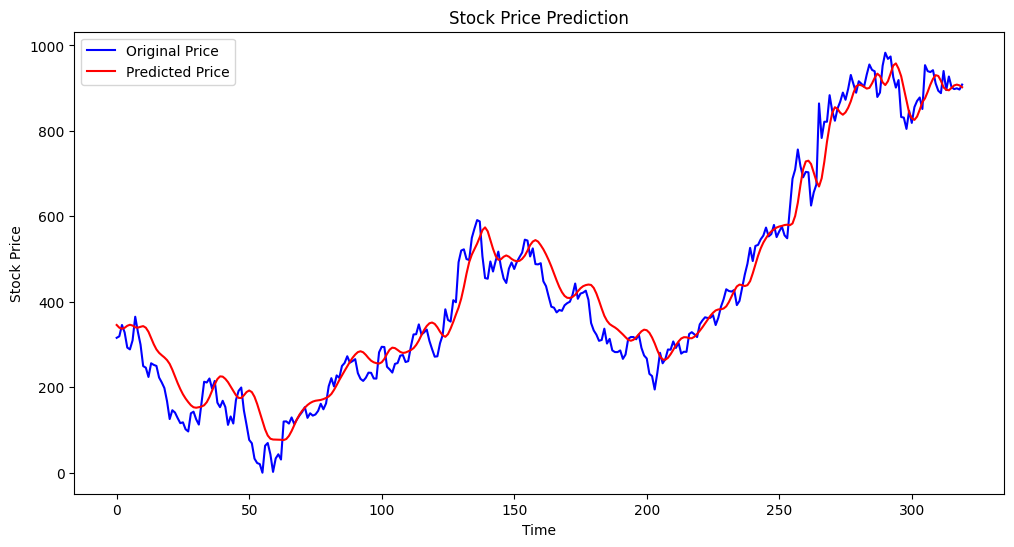

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()